In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("tips.csv")

In [3]:
df.shape

(244, 7)

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
dg = df.groupby('day')

In [8]:
type(dg)

pandas.core.groupby.groupby.DataFrameGroupBy

In [10]:
dg['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [14]:
dg[['total_bill','tip']].aggregate(['sum','mean'])

total_bill                tip          
            sum       mean     sum      mean
day                                         
Fri      325.88  17.151579   51.96  2.734737
Sat     1778.40  20.441379  260.40  2.993103
Sun     1627.16  21.410000  247.39  3.255132
Thur    1096.33  17.682742  171.83  2.771452

In [18]:
for (day,rows) in  dg:
    print(day)
    print(rows[rows['tip'] > 3])

Fri
     total_bill   tip     sex smoker  day    time  size
91        22.49  3.50    Male     No  Fri  Dinner     2
93        16.32  4.30  Female    Yes  Fri  Dinner     2
94        22.75  3.25  Female     No  Fri  Dinner     2
95        40.17  4.73    Male    Yes  Fri  Dinner     4
96        27.28  4.00    Male    Yes  Fri  Dinner     2
221       13.42  3.48  Female    Yes  Fri   Lunch     2
Sat
     total_bill    tip     sex smoker  day    time  size
19        20.65   3.35    Male     No  Sat  Dinner     3
20        17.92   4.08    Male     No  Sat  Dinner     2
23        39.42   7.58    Male     No  Sat  Dinner     4
24        19.82   3.18    Male     No  Sat  Dinner     2
28        21.70   4.30    Male     No  Sat  Dinner     2
34        17.78   3.27    Male     No  Sat  Dinner     2
35        24.06   3.60    Male     No  Sat  Dinner     3
37        16.93   3.07  Female     No  Sat  Dinner     3
39        31.27   5.00    Male     No  Sat  Dinner     3
59        48.27   6.73    Male

In [20]:
tb = df.groupby('day')['total_bill'].sum()

In [22]:
tb

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [23]:
type(tb)

pandas.core.series.Series

In [24]:
tb['Sun']

1627.1600000000003

In [30]:
df.pivot_table(index='day', columns='size', values='tip',aggfunc=np.sum)

size,1,2,3,4,5,6
day,,,,,,
Fri,1.92,42.31,3.00,4.73,NaN,NaN
Sat,2.00,133.43,68.36,53.61,3.00,NaN
Sun,NaN,109.86,46.81,73.58,12.14,5.0
Thur,1.83,117.24,10.77,21.09,5.00,15.9


In [32]:
df.pivot_table(index=['day','sex'], columns='size', values='tip',aggfunc=[np.mean,np.sum])

mean                                            sum         \
size            1         2         3         4     5    6     1      2   
day  sex                                                                  
Fri  Female   NaN  2.753750  3.000000       NaN   NaN  NaN   NaN  22.03   
     Male    1.92  2.535000       NaN  4.730000   NaN  NaN  1.92  20.28   
Sat  Female  1.00  2.693158  3.948000  2.770000   NaN  NaN  2.00  51.17   
     Male     NaN  2.419412  3.740000  4.370000  3.00  NaN   NaN  82.26   
Sun  Female   NaN  2.820000  3.028333  4.390000  5.14  NaN   NaN  19.74   
     Male     NaN  2.816250  3.182222  4.001429  3.50  5.0   NaN  90.12   
Thur Female  1.83  2.237917  2.295000  4.363333   NaN  4.6  1.83  53.71   
     Male     NaN  2.647083  3.090000  4.000000  5.00  6.7   NaN  63.53   

                                      
size             3      4     5    6  
day  sex                              
Fri  Female   3.00    NaN   NaN  NaN  
     Male      NaN   4.73   NaN  NaN  
Sat  Female  19.74   5.54   NaN  NaN  
     Male    48.62  48.07  3.00  NaN  
Sun  Female  18.17  17.56  5.14  NaN  
     Male    28.64  56.02  7.00  5.0  
Thur Female   4.59  13.09   NaN  9.2  
     Male     6.18   8.00  5.00  6.7

In [4]:
df.to_json("tips.json", orient='records')

In [8]:
pd.get_dummies(df[['smoker','sex']])

,smoker_No,smoker_Yes,sex_Female,sex_Male
0,1,0,1,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,1,0
5,1,0,0,1
6,1,0,0,1
7,1,0,0,1
8,1,0,0,1
9,1,0,0,1


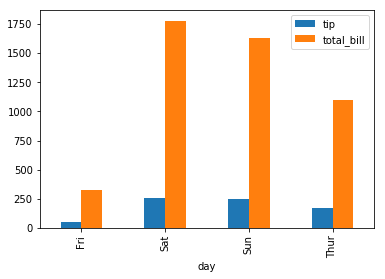

In [14]:
df.groupby('day')['tip','total_bill'].sum().plot.bar()

In [11]:
%matplotlib inline